In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
from sklearn.linear_model import LogisticRegression
import sys

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# df_season_1=pd.read_csv('D1.csv')
# df_season_2 = pd.read_csv('D1_last.csv')

# df_season_1.to_excel('output.xlsx')
# df_season_2.to_excel('output2.xlsx')

In [3]:
df_season_1 = pd.read_excel('output.xlsx')
df_season_2 = pd.read_excel('output2.xlsx')

## Data Exploration & Preparation

In [4]:
df_season_1.head()

,Unnamed: 0,Div,Date,Day,Month,Year,Time,HomeTeam,AwayTeam,FTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,D1,16/08/2019,16,8,2019,19:30,Bayern Munich,Hertha,2.0,...,3.40,-2.25,2.03,1.90,1.99,1.93,2.04,1.93,1.98,1.91
1,1,D1,17/08/2019,17,8,2019,14:30,Dortmund,Augsburg,5.0,...,3.31,-2.25,1.92,2.01,1.92,2.00,1.98,2.04,1.91,1.97
2,2,D1,17/08/2019,17,8,2019,14:30,Freiburg,Mainz,3.0,...,1.89,0.00,1.92,2.01,1.94,1.97,1.97,2.06,1.90,1.99
3,3,D1,17/08/2019,17,8,2019,14:30,Leverkusen,Paderborn,3.0,...,3.58,-2.00,2.07,1.86,2.05,1.86,2.15,1.91,2.03,1.85
4,4,D1,17/08/2019,17,8,2019,14:30,Werder Bremen,Fortuna Dusseldorf,1.0,...,2.26,-0.75,1.92,2.01,1.92,2.00,1.95,2.11,1.89,2.00


In [6]:
df_season_2.head()

,Unnamed: 0,Div,Date,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,D1,24/08/2018,24,8,2018,Bayern Munich,Hoffenheim,3,1,...,3.55,22,-2.00,1.92,1.87,2.05,1.99,1.23,7.15,14.10
1,1,D1,25/08/2018,25,8,2018,Fortuna Dusseldorf,Augsburg,1,2,...,1.76,20,0.00,1.80,1.76,2.17,2.11,2.74,3.33,2.78
2,2,D1,25/08/2018,25,8,2018,Freiburg,Ein Frankfurt,0,2,...,1.69,20,-0.25,2.02,1.99,1.92,1.88,2.52,3.30,3.07
3,3,D1,25/08/2018,25,8,2018,Hertha,Nurnberg,1,0,...,1.76,20,-0.25,1.78,1.74,2.21,2.14,1.79,3.61,5.21
4,4,D1,25/08/2018,25,8,2018,M'gladbach,Leverkusen,2,0,...,2.32,20,0.00,2.13,2.07,1.84,1.78,2.63,3.70,2.69


In [7]:
teams_s1 = df_season_1.columns.unique()

In [8]:
teams_s1.shape

(109,)

In [9]:
teams_s2 = df_season_2.columns.unique()

In [10]:
teams_s2.shape

(65,)

In [11]:
same_columns = np.intersect1d(teams_s1, teams_s2)

In [12]:
df_season_1 = df_season_1[same_columns]
df_season_2 = df_season_2[same_columns]

In [13]:
df_both_seasons = pd.concat([df_season_1, df_season_2], axis=0)

In [14]:
df_both_seasons_essentials = df_both_seasons[['Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]

In [15]:
df_both_seasons_essentials['HTGDIFF'] = df_both_seasons_essentials['FTHG'] - df_both_seasons_essentials['FTAG']
df_both_seasons_essentials['ATGDIFF'] = df_both_seasons_essentials['FTAG'] - df_both_seasons_essentials['FTHG']

In [16]:
df_both_seasons_essentials.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,HC,AC,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF
0,16,8,2019,Bayern Munich,Hertha,2.0,2.0,17.0,6.0,7.0,...,12.0,0.0,6.0,17.0,3.0,3.0,0.0,0.0,0.0,0.0
1,17,8,2019,Dortmund,Augsburg,5.0,1.0,23.0,5.0,10.0,...,10.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,4.0,-4.0
2,17,8,2019,Freiburg,Mainz,3.0,0.0,19.0,19.0,8.0,...,5.0,5.0,6.0,15.0,1.0,3.0,0.0,0.0,3.0,-3.0
3,17,8,2019,Leverkusen,Paderborn,3.0,2.0,13.0,11.0,4.0,...,6.0,6.0,8.0,9.0,2.0,0.0,0.0,0.0,1.0,-1.0
4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1.0,3.0,23.0,12.0,10.0,...,14.0,5.0,8.0,13.0,0.0,2.0,0.0,0.0,-2.0,2.0


In [17]:
# df_both_seasons_essentials['Day'] = df_both_seasons_essentials['Date'].dt.day
# df_both_seasons_essentials['Month'] = df_both_seasons_essentials['Date'].dt.month
# df_both_seasons_essentials['Year'] = df_both_seasons_essentials['Date'].dt.year

In [18]:
df_both_seasons_essentials= df_both_seasons_essentials.sort_values(['Year', 'Month','Day'], ascending=False)

In [19]:
df_both_seasons_essentials.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,...,HC,AC,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF
133,15,12,2019,Wolfsburg,M'gladbach,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,15,12,2019,Schalke 04,Ein Frankfurt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,14,12,2019,Bayern Munich,Werder Bremen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,14,12,2019,Hertha,Freiburg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,14,12,2019,Mainz,Dortmund,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Counts the amount of home + away games every team had during the first division
# (Bundesliga) for the current and last season
df_both_seasons_essentials.groupby('HomeTeam').count()

,Day,Month,Year,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTGDIFF,ATGDIFF
HomeTeam,,,,,,,,,,,,,,,,,,,,
Augsburg,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Bayern Munich,25,25,25,25,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Dortmund,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Ein Frankfurt,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
FC Koln,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Fortuna Dusseldorf,24,24,24,24,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Freiburg,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Hannover,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Hertha,24,24,24,24,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


In [21]:
import datetime

# Get years, months, and days
years = df_both_seasons_essentials['Year']
months = df_both_seasons_essentials['Month']
days = df_both_seasons_essentials['Day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

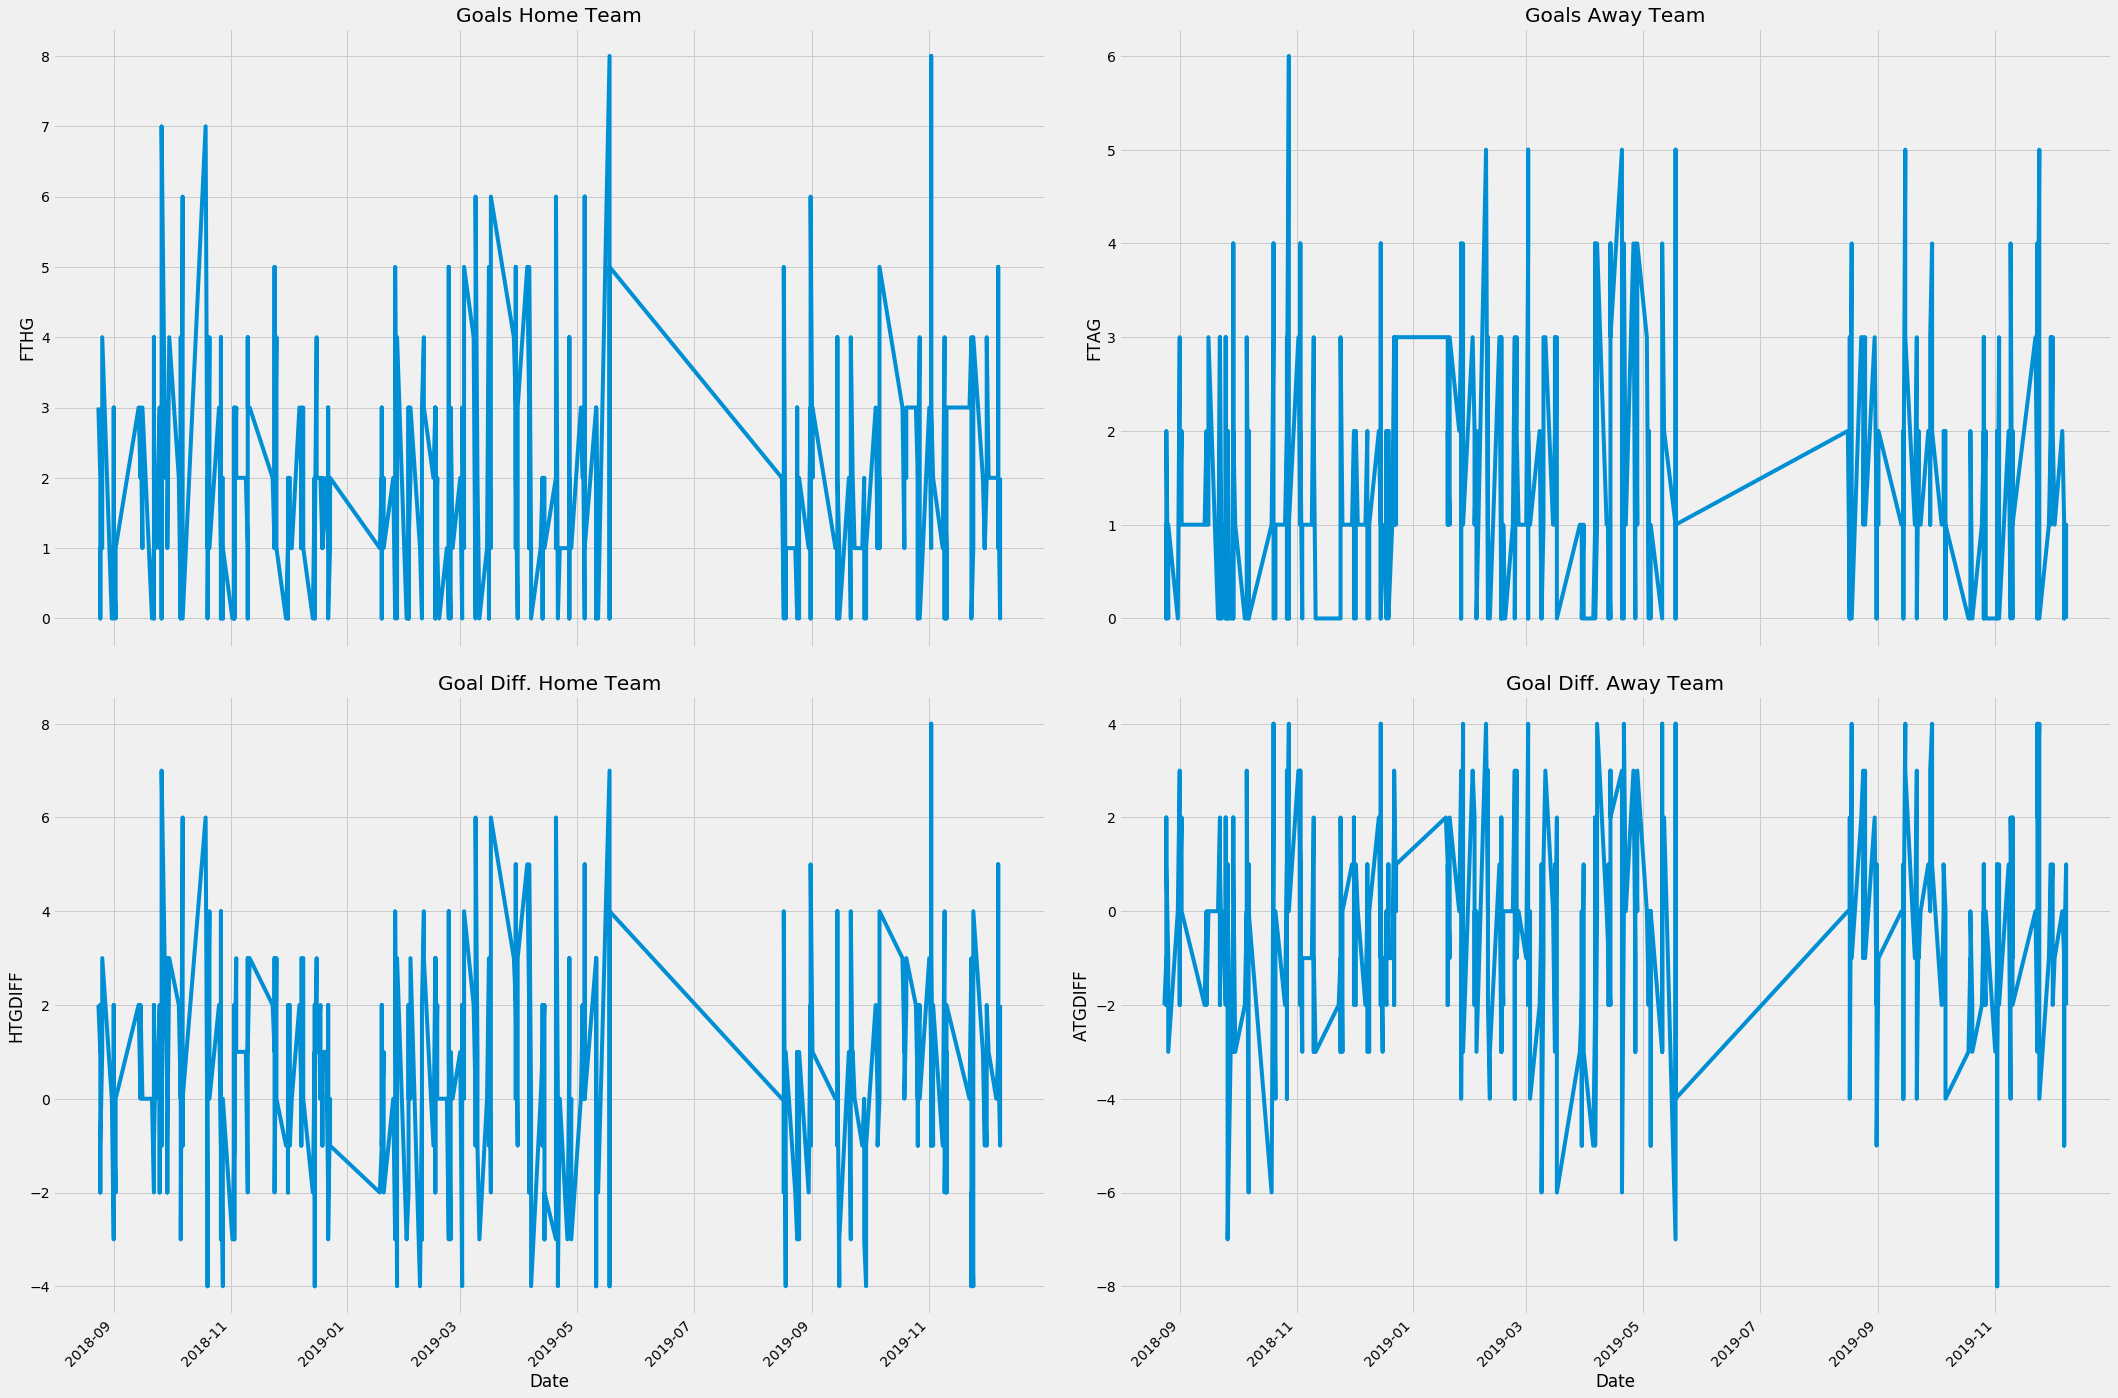

In [23]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (30,20))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, df_both_seasons_essentials['FTHG'])
ax1.set_xlabel(''); ax1.set_ylabel('FTHG'); ax1.set_title('Goals Home Team')

# Temperature from 1 day ago
ax2.plot(dates, df_both_seasons_essentials['FTAG'])
ax2.set_xlabel(''); ax2.set_ylabel('FTAG'); ax2.set_title('Goals Away Team')

# Temperature from 2 days ago
ax3.plot(dates, df_both_seasons_essentials['HTGDIFF'])
ax3.set_xlabel('Date'); ax3.set_ylabel('HTGDIFF'); ax3.set_title('Goal Diff. Home Team')

# Friend Estimate
ax4.plot(dates, df_both_seasons_essentials['ATGDIFF'])
ax4.set_xlabel('Date'); ax4.set_ylabel('ATGDIFF'); ax4.set_title('Goal Diff. Away Team')

plt.tight_layout(pad=2)

In [24]:
from pandas.plotting import scatter_matrix

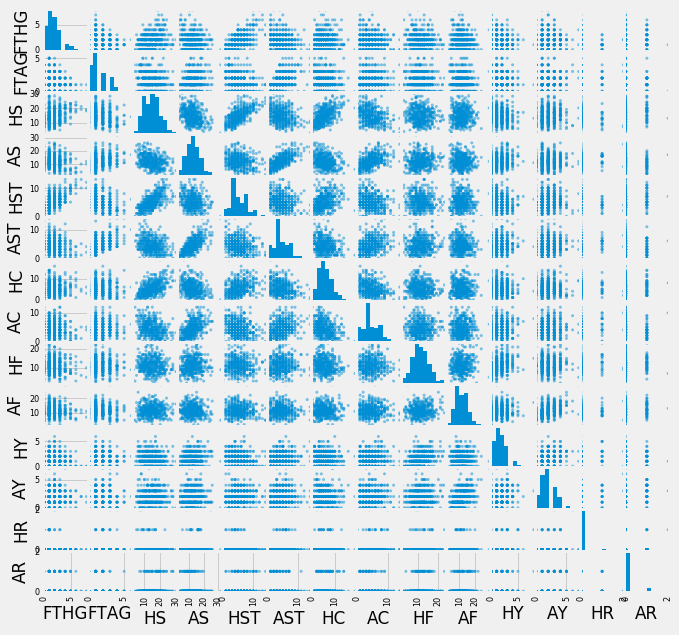

In [25]:
scatter_matrix(df_both_seasons_essentials[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']], figsize=(10,10));


In [26]:
import pickle
df_both_seasons_essentials.to_pickle('df_both_seasons_essentials')